In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from math import sqrt
import math
from labs import *

In [4]:
d1 = Value(5.2, 0.05)
d2 = Value(3.00, 0.1)
d3 = Value(4.1, 0.05)
sigmat=0.05
sigmad1=0.1 #мм
sigmad2=0.05
sigmad3=0.05
epsV=0.01
sigmah=1
p=(98920*0.029)/(8.31*(273+22))
r1=d1/2*0.001
r3=d3/2*0.001

In [5]:
QP=pd.read_csv('Q(P).csv')
QP['Q']=(QP['V']*0.001)/QP['t']
QP['sigmaQ']=QP['Q']*((epsV)**2+(sigmat/QP['t'])**2)**(1/2)
QP['P']=1*QP['h']*QP['K']*9.8067*(0.81263/0.8095)
QP['sigmaP']=QP['P']*(sigmah/QP['h'])
QP['epsP']=QP['sigmaP']/QP['P']
QP

,V,t,K,h,Q,sigmaQ,P,sigmaP,epsP
0,5,63.93,0.3,40,0.000078,7.844938e-07,118.135421,2.953386,0.025000
1,1,33.08,0.3,17,0.000030,3.057311e-07,50.207554,2.953386,0.058824
2,1,20.30,0.3,26,0.000049,5.073333e-07,76.788024,2.953386,0.038462
3,1,16.08,0.3,33,0.000062,6.512613e-07,97.461722,2.953386,0.030303
4,2,28.33,0.3,37,0.000071,7.168762e-07,109.275265,2.953386,0.027027
5,1,11.67,0.3,45,0.000086,9.322360e-07,132.902349,2.953386,0.022222
6,1,63.63,0.3,10,0.000016,1.576430e-07,29.533855,2.953386,0.100000
7,1,26.83,0.3,21,0.000037,3.791340e-07,62.021096,2.953386,0.047619
8,1,12.77,0.3,40,0.000078,8.409716e-07,118.135421,2.953386,0.025000
9,2,20.93,0.3,51,0.000096,9.824546e-07,150.622662,2.953386,0.019608


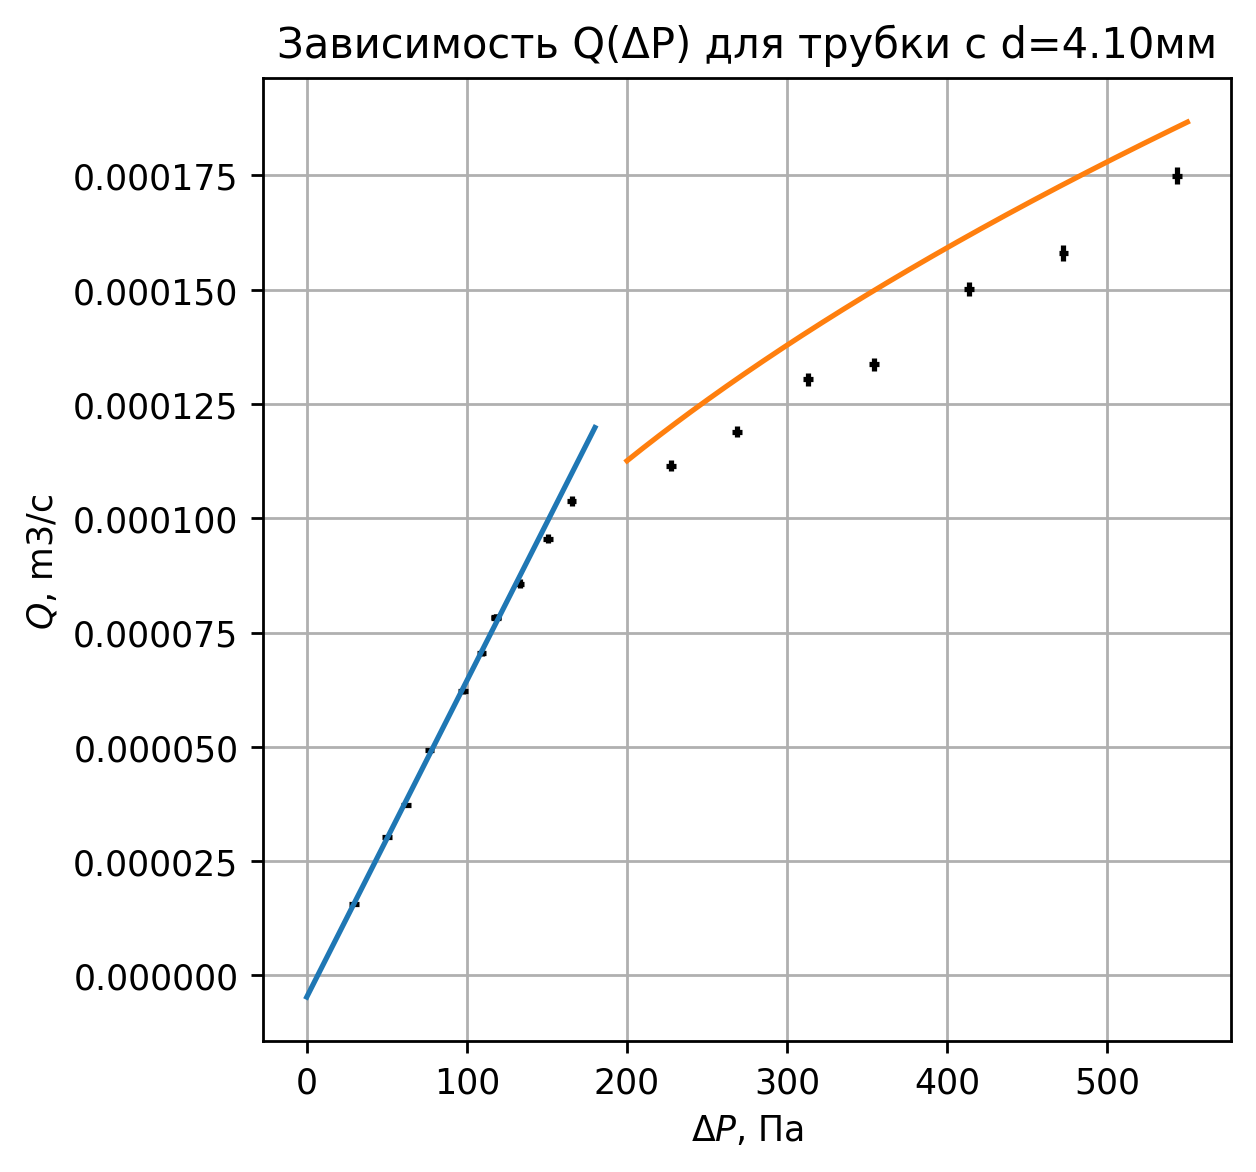

In [6]:
x=[0,180]
y=[]
x1=[]
y1=[]
for i in range (200,551):
    x1.append(i)
    y1.append((i/(p*0.5))**(1/2)*(r3)**(2.5)*32)
for i in range (2):
    y.append(x[i]*6.92182e-07-4.74414e-06)
plt.figure(figsize=(5,5), dpi=250)
plt.ylabel("$Q$, m3/c ")
plt.xlabel("$ΔP$, Па")
plt.title('Зависимость Q(ΔP) для трубки с d=4.10мм')
plt.grid(True, linestyle="-")
plt.errorbar(QP['P'], QP['Q'], xerr=QP['sigmaP'], yerr=QP['sigmaQ'], color = 'black', fmt='none')
plt.plot(x,y)
plt.plot(x1,y1)

In [7]:
def line(x, a, b):
    return a * x + b 

params, cov = curve_fit(line, QP['P'][0:9], QP['Q'][0:9], sigma=QP['sigmaQ'][0:9])
a=params[0]
sigmaa=(cov[0][0])**(1/2)
print(f"a = {params[0]:.6} \u00B1 {np.sqrt(cov[0][0]):.5}")
print(f"b = {params[1]:.6} \u00B1 {np.sqrt(cov[1][1]):.5}")
n1=(3.14*((d3*0.001)/2)**4)/(8*a*0.5)
sigman1=n1*((4*sigmad3/d3)**2+(sigmaa/a)**2+(0.04)**2)**(1/2)
n1, sigman1, a

a = 6.92389e-07 ± 6.7438e-09
b = -4.7523e-06 ± 3.7742e-07


((0.00002±0.), (0.000001±0.), 6.92389339171449e-07)

In [8]:
Re=((98920*0.029/(8.31*(273+21.8)))*(0.0001/(3.14*(d3/2*0.001)**2))*(d3/2)*0.001)/(1.74e-05)
sigmaRe=Re*((sigman/n)**2+(10/98920)**2+(0.1/294.8)**2+(0.001)**2+(2*0.05/3.95)**2)**(1/2)
Re, sigmaRe, 0.2*Re*(3.95*0.001/2)

NameError: name 'sigman' is not defined

# Общая часть

In [ ]:
Px=pd.read_csv('P(x).csv')
Px['h'][3]=4
Px['P']=1*Px['h']*0.3*9.8067*(0.81263/0.8095)
Px['sigmaP']=Px['P']*(sigmah/Px['h'])
Px['l']=Px['l']*0.01
Px

C:\Users\kasya\AppData\Local\Temp\ipykernel_16592\1444498860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Px['h'][3]=4


,l,h,P,sigmaP
0,1.312,44,129.948963,2.953386
1,0.812,29,85.648180,2.953386
2,0.412,17,50.207554,2.953386
3,0.112,4,11.813542,2.953386


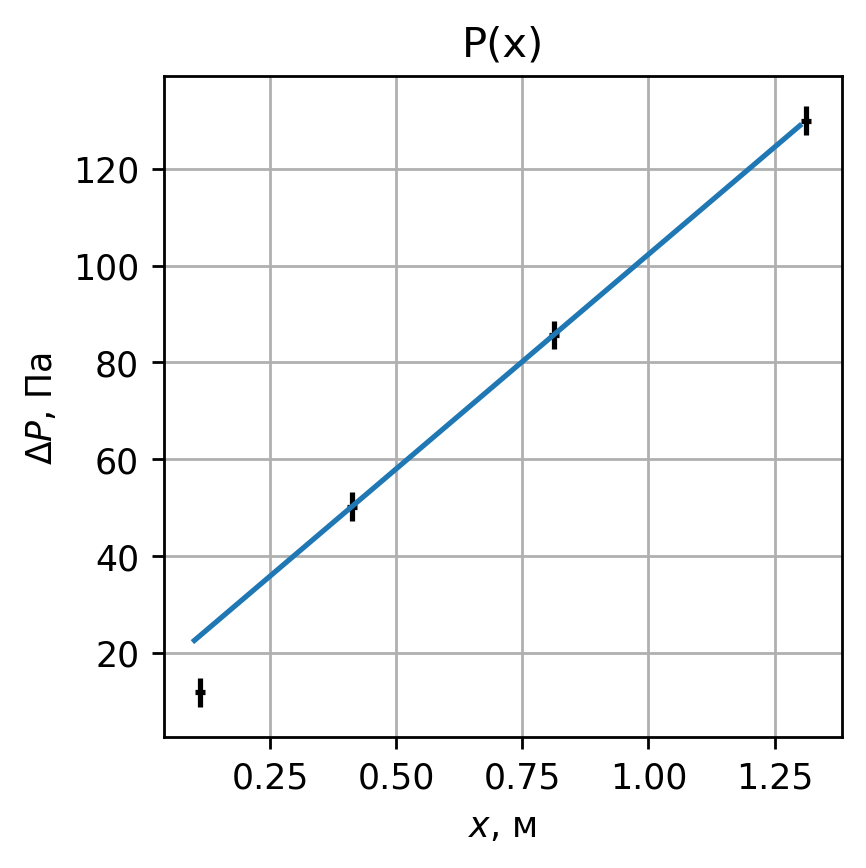

In [ ]:
x=[0.1, 1.3]
y=[]
for i in range (2):
    y.append(x[i]*88.6+13.7)
plt.figure(figsize=(3.5,3.5), dpi=250)
plt.ylabel("$ΔP$, Па ")
plt.xlabel("$x$, м")
plt.title('P(x)')
plt.grid(True, linestyle="-")
plt.errorbar(Px['l'], Px['P'], xerr=0.01, yerr=Px['sigmaP'], color = 'black', fmt='none')
plt.plot(x,y)

In [ ]:
def line(x, a, b):
    return a * x + b 

params, cov = curve_fit(line, Px['l'][1:4], Px['P'][1:4], sigma=Px['sigmaP'][1:4])
a=params[0]
sigmaa=(cov[0][0])**(1/2)
print(f"a = {params[0]:.6} \u00B1 {np.sqrt(cov[0][0]):.5}")
print(f"b = {params[1]:.6} \u00B1 {np.sqrt(cov[1][1]):.5}")

a = 88.6016 ± 0.0
b = 13.7037 ± 0.0


In [ ]:
Px[0:4]

,l,h,P,sigmaP
0,1.312,44,129.948963,2.953386
1,0.812,29,85.648180,2.953386
2,0.412,17,50.207554,2.953386
3,0.112,8,23.627084,2.953386


In [ ]:
QR=pd.read_csv('Q(R).csv')
QR['Q']=QR['V']*0.001/QR['t']
QR['sigmaQ']=QR['Q']*((epsV)**2+(sigmat/QR['t'])**2)**(1/2)
QR['R']=QR['d']*0.001/2
QR['sigmaR']=0.025*0.001
QR['lnQ']=abs(np.log(QR['Q']))
QR['lnR']=abs(np.log(QR['R']))
QR['sigmalnQ']=QR['sigmaQ']/QR['Q']
QR['sigmalnR']=QR['sigmaR']/QR['R']
QR

,d,V,t,Q,sigmaQ,R,sigmaR,lnQ,lnR,sigmalnQ,sigmalnR
0,3.95,1.0,38.32,0.000026,2.610492e-07,0.001975,0.000025,10.553727,6.227187,0.010003,0.012658
1,5.30,1.0,12.96,0.000077,7.738985e-07,0.002650,0.000025,9.469623,5.933196,0.010030,0.009434
2,5.30,5.0,61.86,0.000081,8.083824e-07,0.002650,0.000025,9.423191,5.933196,0.010001,0.009434
3,3.95,1.0,42.96,0.000023,2.328377e-07,0.001975,0.000025,10.668025,6.227187,0.010003,0.012658
4,4.10,1.0,38.26,0.000026,2.614588e-07,0.002050,0.000025,10.552160,6.189915,0.010003,0.012195
5,5.20,1.5,13.97,0.000107,1.076477e-06,0.002600,0.000025,9.139202,5.952244,0.010026,0.009615
6,3.00,1.0,48.35,0.000021,2.068695e-07,0.001500,0.000025,10.786222,6.502290,0.010002,0.016667


In [ ]:
def line(x, a, b):
    return a * x + b 

params = curve_fit(line, x, y)
a=params[0]
sigmaa=(cov[0][0])**(1/2)
print(f"a = {params[0]:.6} \u00B1 {np.sqrt(cov[0][0]):.5}")
print(f"b = {params[1]:.6} \u00B1 {np.sqrt(cov[1][1]):.5}")

C:\Users\kasya\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


TypeError: unsupported format string passed to numpy.ndarray.__format__

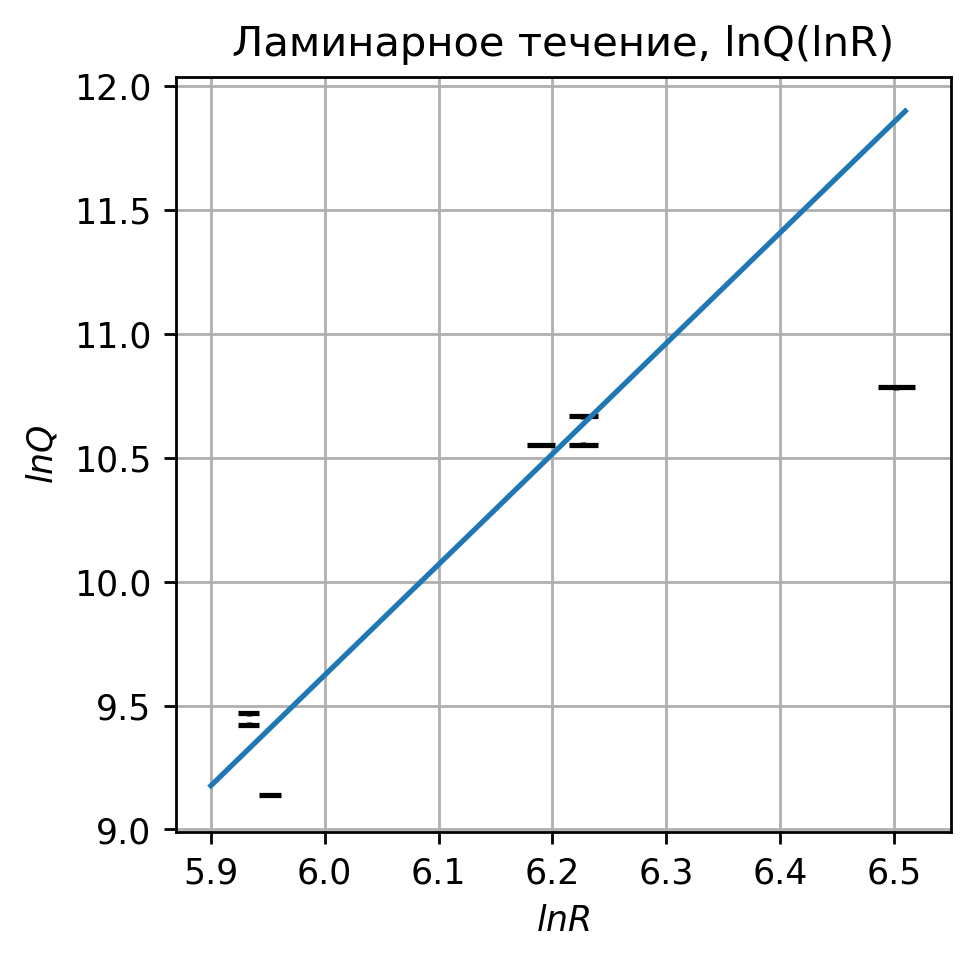

In [ ]:
x=[5.9, 6.51]
y=[]
for i in range (2):
    y.append(x[i]*4.46425-17.1622)
plt.figure(figsize=(4,4), dpi=250)
plt.ylabel("$lnQ$")
plt.xlabel("$lnR$")
plt.title('Ламинарное течение, lnQ(lnR)')
plt.grid(True, linestyle="-")
plt.errorbar(QR['lnR'], QR['lnQ'], xerr=QR['sigmalnR'], yerr=QR['sigmalnQ'], color = 'black', fmt='none')
plt.plot(x,y)

In [ ]:
def line(x, a, b):
    return a * x + b 

params, cov = curve_fit(line, QR['lnR'][0:6], QR['lnQ'][0:6], sigma=QR['sigmalnQ'][0:6])
a=params[0]
sigmaa=(cov[0][0])**(1/2)
print(f"a = {params[0]:.6} \u00B1 {np.sqrt(cov[0][0]):.5}")
print(f"b = {params[1]:.6} \u00B1 {np.sqrt(cov[1][1]):.5}")

a = 4.46425 ± 0.50732
b = -17.1622 ± 3.084


In [ ]:
QR[0:6]

In [ ]:
Rep1=pd.DataFrame({'Q':QP['Q'], 'P':QP['P'], 'sigmaQ':QP['sigmaQ'], 'sigmaP':QP['sigmaP']})
Rep1['u']=(Rep1['Q'])/(math.pi*(r3)**2)
Rep1['sigmau']=Rep1['u']*(Rep1['sigmaQ']/Rep1['Q'])
Rep1['Re']=(p*Rep1['u']*r3)/(n1)
Rep1['sigmaRe']=Rep1['Re']*((sigman1/n1)**2+(Rep1['sigmau']/Rep1['u'])**2)**(1/2)
Rep1['phi']=(r3*Rep1['P'])/(0.5*p*(Rep1['u'])**2)
Rep1['sigmaphi']=Rep1['phi']*((Rep1['sigmaP']/Rep1['P'])**2+(Rep1['sigmau']/Rep1['u'])**2)**(1/2)
Rep1

,Q,P,sigmaQ,sigmaP,u,sigmau,Re,sigmaRe,phi,sigmaphi
0,0.000078,118.135421,7.822011e-07,2.953386,6.382359,0.063831,854.849644,56.442775,0.009789,0.000264
1,0.000030,50.207554,3.024356e-07,2.953386,2.466894,0.024680,330.414376,21.816290,0.027849,0.001662
2,0.000049,76.788024,4.932082e-07,2.953386,4.019943,0.040248,538.428943,35.551497,0.016040,0.000637
3,0.000062,97.461722,6.230920e-07,2.953386,5.074928,0.050847,679.733056,44.882295,0.012774,0.000408
4,0.000071,109.275265,7.064051e-07,2.953386,5.761020,0.057646,771.627783,50.948508,0.011114,0.000320
5,0.000086,132.902349,8.600383e-07,2.953386,6.992703,0.070183,936.598761,61.845422,0.009174,0.000224
6,0.000016,29.533855,1.571780e-07,2.953386,1.282490,0.012826,171.776010,11.341778,0.060611,0.006091
7,0.000037,62.021096,3.729759e-07,2.953386,3.041552,0.030437,407.383807,26.898501,0.022630,0.001101
8,0.000078,118.135421,7.854827e-07,2.953386,6.390356,0.064099,855.920716,56.517310,0.009765,0.000263
9,0.000096,150.622662,9.566562e-07,2.953386,7.797883,0.078068,1044.444103,68.962656,0.008361,0.000184


In [ ]:
Rep2=pd.DataFrame({'Q':QP2['Q'], 'P':QP2['P'], 'sigmaQ':QP2['sigmaQ'], 'sigmaP':QP2['sigmaP']})
Rep2['u']=(Rep2['Q'])/(math.pi*(r1)**2)
Rep2['sigmau']=Rep2['u']*(Rep2['sigmaQ']/Rep2['Q'])
Rep2['Re']=(p*Rep2['u']*r1)/(n2)
Rep2['sigmaRe']=Rep2['Re']*((sigman2/n2)**2+(Rep2['sigmau']/Rep2['u'])**2)**(1/2)
Rep2['phi']=(r1*Rep2['P'])/(0.5*p*(Rep2['u'])**2)
Rep2['sigmaphi']=Rep2['phi']*((Rep2['sigmaP']/Rep2['P'])**2+(Rep2['sigmau']/Rep2['u'])**2)**(1/2)
Rep2

,Q,P,sigmaQ,sigmaP,u,sigmau,Re,sigmaRe,phi,sigmaphi
0,0.000077,44.315690,7.744996e-07,2.954379,3.500166,0.035106,554.750689,33.344828,0.016383,0.001105
1,0.000108,59.087587,1.079733e-06,2.954379,4.887024,0.048941,774.557565,46.554961,0.011205,0.000571
2,0.000112,59.087587,1.124733e-06,1.969586,5.090078,0.050981,806.740193,48.489470,0.010329,0.000360
3,0.000094,49.239656,9.453390e-07,1.969586,4.280184,0.042850,678.377849,40.773675,0.012173,0.000502
4,0.000073,39.391725,7.306800e-07,1.969586,3.309759,0.033120,524.572575,31.528869,0.016287,0.000830
5,0.000051,29.543794,5.107612e-07,1.969586,2.314381,0.023151,366.812429,22.046658,0.024981,0.001684
6,0.000032,19.695862,3.240040e-07,1.969586,1.467848,0.014686,232.643181,13.982712,0.041403,0.004161
7,0.000027,9.847931,2.703690e-07,1.969586,1.225058,0.012255,194.162741,11.669845,0.029720,0.005951
8,0.000189,189.080279,1.898784e-06,2.954379,8.568459,0.086066,1358.038075,81.632000,0.011664,0.000217
9,0.000209,221.578452,2.095662e-06,2.954379,9.476058,0.094990,1501.886011,90.273641,0.011176,0.000186


In [ ]:
def line(x, a, b):
    return a * x + b 

params, cov = curve_fit(line, Rep1['Re'], Rep1['phi'], sigma=Rep1['sigmaphi'])
a=params[0]
sigmaa=(cov[0][0])**(1/2)
print(f"a = {params[0]:.6} \u00B1 {np.sqrt(cov[0][0]):.5}")
print(f"b = {params[1]:.6} \u00B1 {np.sqrt(cov[1][1]):.5}")

a = -4.17551e-06 ± 4.6671e-06
b = 0.0453106 ± 0.0051514


<ErrorbarContainer object of 3 artists>

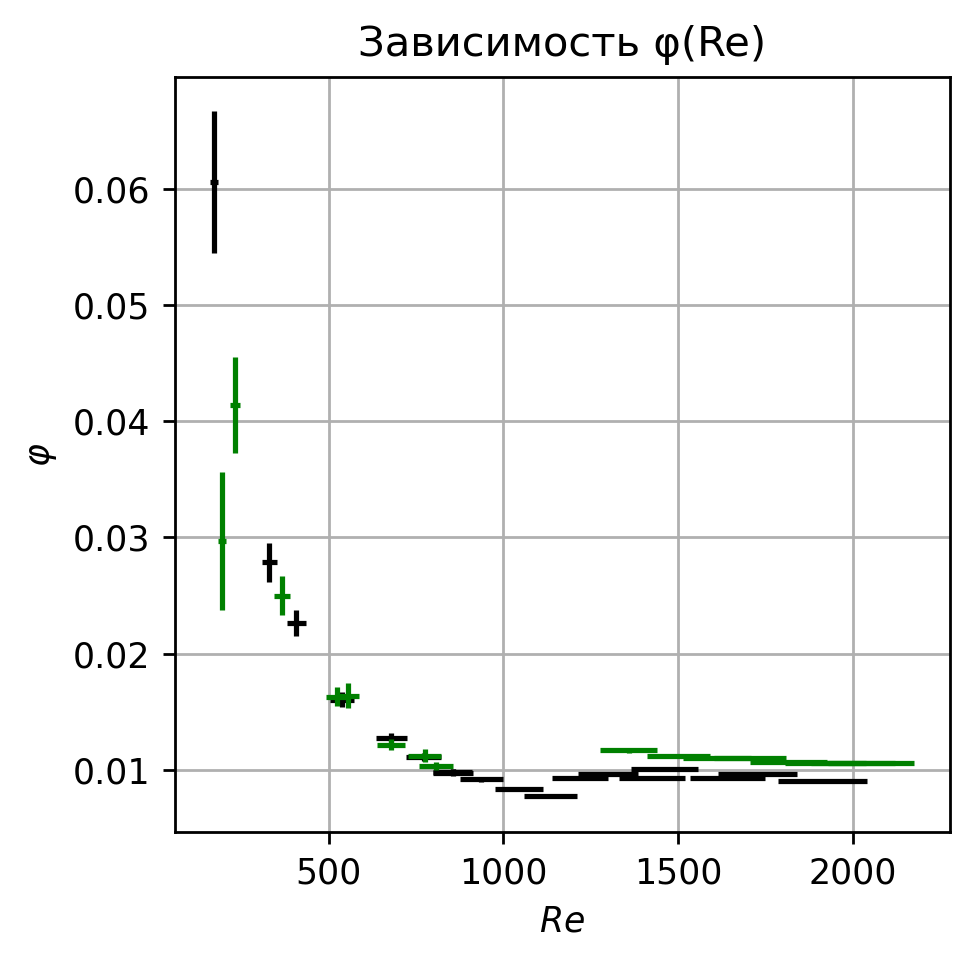

In [ ]:
#x=[5.9, 6.51]
#y=[]
#for i in range (2):
    #y.append(x[i]*4.46425-17.1622)
plt.figure(figsize=(4,4), dpi=250)
plt.ylabel("$φ$")
plt.xlabel("$Re$")
plt.title('Зависимость φ(Re)')
plt.grid(True, linestyle="-")
plt.errorbar(Rep1['Re'], Rep1['phi'], xerr=Rep1['sigmaRe'], yerr=Rep1['sigmaphi'], color = 'black', fmt='none')
plt.errorbar(Rep2['Re'], Rep2['phi'], xerr=Rep2['sigmaRe'], yerr=Rep2['sigmaphi'], color = 'green', fmt='none')
#plt.plot(x,y)

In [ ]:
x=[3.95/2,3.00/2]
for i in range (len(x)):
    x[i]=x[i]*0.001
y=[1/38.32,1/36.72]
for i in range (len(y)):
    y[i]=y[i]*0.001
    y[i]=(math.log(y[i]))
    x[i]=(math.log(x[i]))
print(x, y)
print((y[1]-y[0])/(x[1]-x[0]))

In [ ]:
plt.figure(figsize=(5,5), dpi=250)
#plt.ylabel("$ΔT$, °C")
#plt.xlabel("$N$, Вт")
#plt.title('Первый опыт, ΔT(N)')
plt.grid(True, linestyle="-")
plt.plot(x, y, color = 'black')

In [ ]:
def line(x, a, b):
    return a * x + b

params, cov = curve_fit(line, x, y)